# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

1. Has life expectancy increased over time in the six nations?
2. Has GDP increased over time in the six nations?
3. Is there a correlation between GDP and life expectancy of a country?
4. What is the average life expectancy in these nations?
5. What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

# Import Python Modules

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Loading the Data

In [3]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


# Exploring the Data

In [4]:
print(df.head())
print(df.Country.unique())
print(df.Year.unique())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


There seems to be 6 different countries (Chile, China, Germany, Mexico, USA, and Zimbabwe) in this dataset with the years ranging from 2000-2015. 

### Renaming columns

Most of the column names are easy to work with expect for the "Life expectancy at birth (years)" which we will change to life_expectancy_at_birth and we will also change the column names to be all lowercase.

In [5]:
df.rename(columns={
    "Country": "country",
    "Year": "year",
    "Life expectancy at birth (years)": "life_expectancy_at_birth",
}, inplace=True)

print(df.head())


  country  year  life_expectancy_at_birth           GDP
0   Chile  2000                      77.3  7.786093e+10
1   Chile  2001                      77.3  7.097992e+10
2   Chile  2002                      77.8  6.973681e+10
3   Chile  2003                      77.9  7.564346e+10
4   Chile  2004                      78.0  9.921039e+10


### Lets explore some graphs of life expectancy for different countries over the years 2000-2015 

                    country    year  life_expectancy_at_birth           GDP
0                     Chile  2007.5                  78.94375  1.697888e+11
1                     China  2007.5                  74.26250  4.957714e+12
2                   Germany  2007.5                  79.65625  3.094776e+12
3                    Mexico  2007.5                  75.71875  9.766506e+11
4  United States of America  2007.5                  78.06250  1.407500e+13
5                  Zimbabwe  2007.5                  50.09375  9.062580e+09


Text(0.5, 1.0, 'Life Expectancy at Birth of Different Countries')

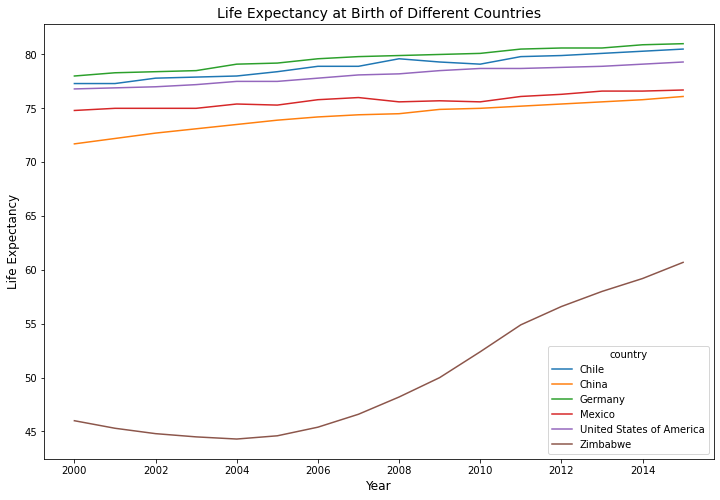

In [35]:
# Average Life Expectancy for Each Country

life_expectancy_mean = df.groupby('country').mean().reset_index()
print(life_expectancy_mean)

# Exploring life_expectancy over the years
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.lineplot(data = df, x="year", y="life_expectancy_at_birth", hue="country")
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Life Expectancy", fontsize = 12)
plt.title("Life Expectancy at Birth of Different Countries", fontsize=14)

<AxesSubplot:xlabel='life_expectancy_at_birth', ylabel='country'>

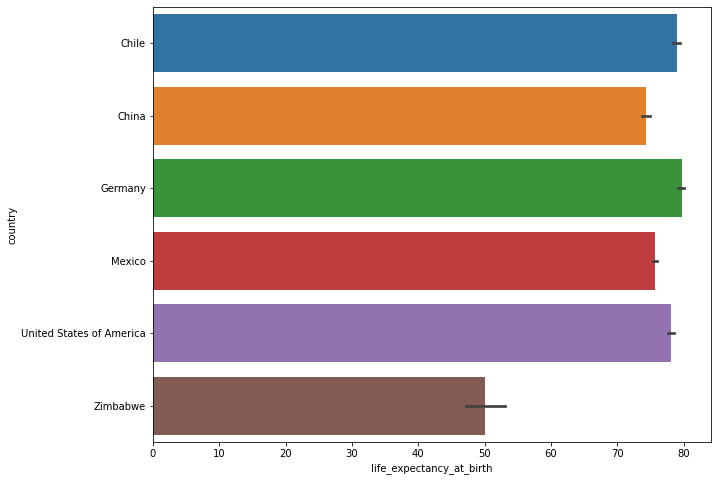

In [7]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.barplot(data= df, x="life_expectancy_at_birth", y="country")

## Has life expectancy increased over time in the six nations?

Based on the linegraph above, life expectancy has steadily increased from 2004-2015 in all countries except for Zimbabwe. Zimbabwe's life expectancy has increased significantly more than the rest in that same time, jumping from around 45 to 60!

The mean life expectancy in all countries except for Zimbabwe range from 70-80 years. Zimbabwe's life expectancy at birth is significantly lower than that of other countries ranging around 50.

Text(0.5, 1.0, 'Average GDP of Countries')

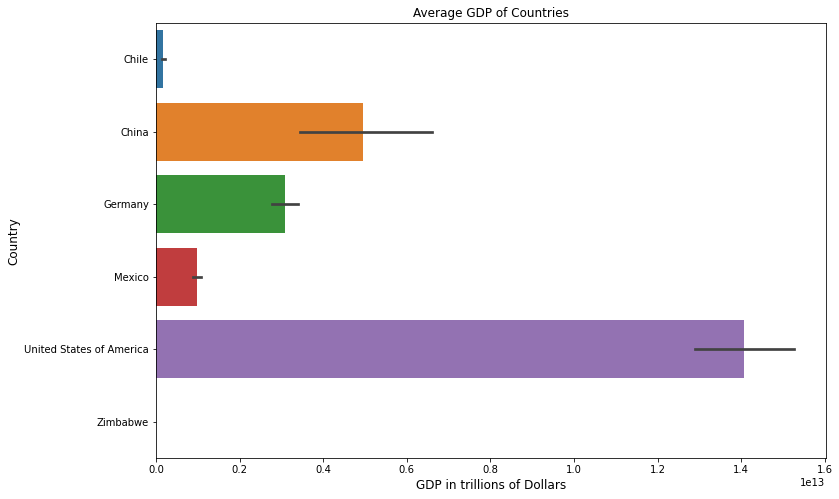

In [8]:
# Exploring GDP in different countries

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.barplot(data=df, x="GDP", y="country")
plt.xlabel("GDP in trillions of Dollars", fontsize = 12)
plt.ylabel("Country", fontsize= 12)
plt.title("Average GDP of Countries")

### Violin Plots
Another way to compare data is to visualize the distributions of each and to look for patterns in the shapes.

The violin plot is a popular choice because it can show the shape of the distribution compared to the box plot. Below, country is on the x-axis and the distribution of numeric columns : GDP and Life Expectancy At Birth are on the y axis.

In the GDP plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges.

In the Life Expectancy At Birth plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

Text(0.5, 1.0, 'Life Expectany in Different Countries')

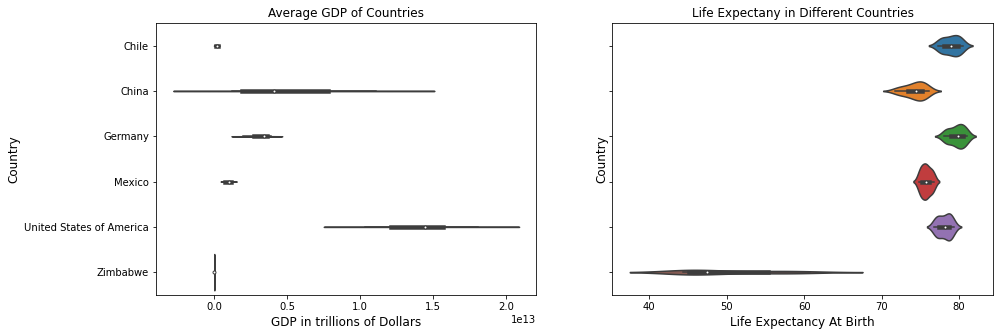

In [14]:
#GDP vs Life Expectancy 

fig, ax = plt.subplots(1,2, sharey=True, figsize = (15,5))

ax[0] = sns.violinplot(ax= ax[0], data=df, x="GDP", y="country")
ax[0].set_xlabel("GDP in trillions of Dollars", fontsize = 12)
ax[0].set_ylabel("Country", fontsize= 12)
ax[0].set_title("Average GDP of Countries")

ax[1] = sns.violinplot(ax= ax[1], data = df, x="life_expectancy_at_birth", y="country")
ax[1].set_xlabel("Life Expectancy At Birth", fontsize = 12)
ax[1].set_ylabel("Country", fontsize = 12)
ax[1].set_title("Life Expectany in Different Countries")

## Line Plots

Text(0.5, 1.0, 'GDP (in Trillions) of Different Countries')

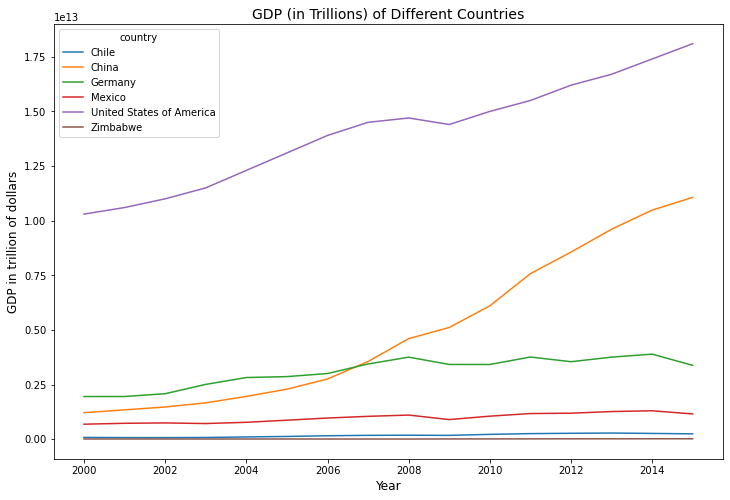

In [10]:
# Exploring GDP over the years for different Countries

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.lineplot(data = df, x="year", y="GDP", hue="country")
plt.xlabel("Year", fontsize = 12)
plt.ylabel("GDP in trillion of dollars", fontsize = 12)
plt.title("GDP (in Trillions) of Different Countries", fontsize=14)

Unlike the chart above when we break down each country into their own chart they get to tell their own story. Each country saw significant growth in their GDP over the years. USA and China didn't see much of a dip at all. Chile and Mexico saw a dip around the same time near 2008. Zimbabwe was in a downward trend until around 2008 and saw a huge upward trend into 2010 and onto 2015. Would be interesting to dive into what happened around then for Zimbabwe and what changes were made. 

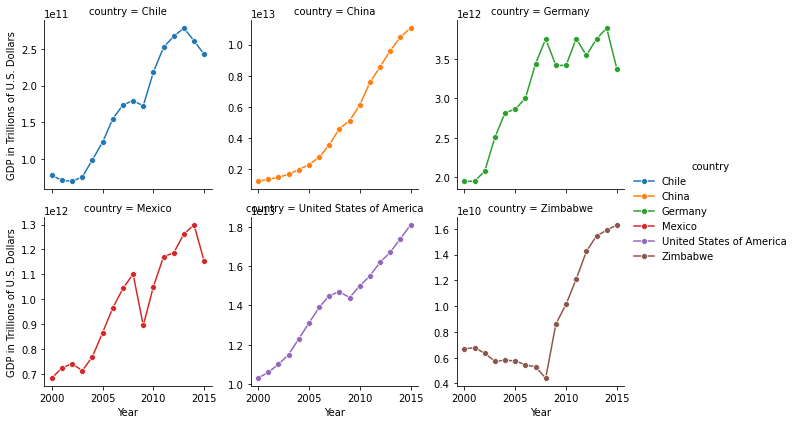

In [12]:
graphGDP = sns.FacetGrid(df, col="country", col_wrap=3,
                      hue = "country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"year","GDP", marker='o')
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

<AxesSubplot:xlabel='life_expectancy_at_birth', ylabel='GDP'>

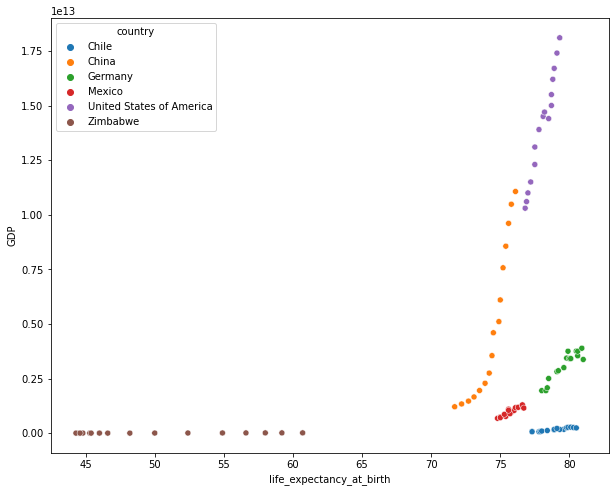

In [20]:
# GDP vs. Life Expectancy

plt.figure(figsize=(10,8))
sns.scatterplot(data = df, x = "life_expectancy_at_birth", y="GDP", hue="country")

Breaking down the life expectancy into individual graphs like we did above for the GDP, the countries run a similar story. Chile and Mexico have a similar dip around 2008 at the same time, Mexico's looking to be a little more severe. China,USA, and Germany have a steady increase with little to no downward movement. Zimbabwe runs the exact same path it did in the GDP chart above. It would be very interesting to see what changes Zimbabwe made from 2005-2010. 

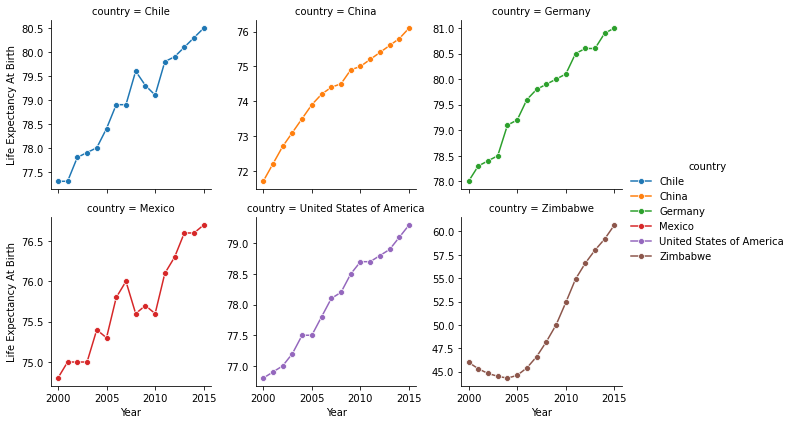

In [37]:
graphLife = sns.FacetGrid(df, col="country", col_wrap=3,
                      hue = "country", sharey = False)

graphLife = (graphLife.map(sns.lineplot,"year","life_expectancy_at_birth", marker='o')
         .add_legend()
         .set_axis_labels("Year","Life Expectancy At Birth"))

graphLife;

# Conclusions

## 1 . Has life expectancy increased over time in these 6 nations? 
Based on the linegraph above, life expectancy has steadily increased from 2004-2015 in all countries except for Zimbabwe. Zimbabwe's life expectancy has increased significantly more than the rest in that same time, jumping from around 45 to 60!

The mean life expectancy in all countries except for Zimbabwe range from 70-80 years. Zimbabwe's life expectancy at birth is significantly lower than that of other countries ranging around 50.

## 2. Has GDP increased over time in the six nations?
Yes. All countries have had tremendous growth in terms of GDP. The United States and China haven't seen much down trend in any of the years while other countries have had a dip or two. 

## 3. Is there a correlation between GDP and life expectancy of a country?
There doesn't seem to be a correlation between GDP and life expectancy. Chile has one of the highest life expectancy creeping just above 80 years old and they are in the bottom 2 in terms of GDP with Zimbabwe. 

## 4. What is the average life expectancy in these nations?
China = 74.26
Germany = 79.66
Mexico = 75.72
USA = 78.06
Zimbabwe = 50.09

## 5. What is the distribution of that life expectancy?
The distribution has a left skew or most of the data was on the right hand side.